<a href="https://colab.research.google.com/github/ant-nik/neural_network_course/blob/main/practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
from torchvision.models import resnet50, ResNet50_Weights, alexnet, AlexNet_Weights
#weights = ResNet50_Weights.DEFAULT
#model = resnet50(weights=weights)
weights = AlexNet_Weights.DEFAULT
model = alexnet(weights=weights) #weights=weights)
model.eval()
transform = weights.transforms()

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [114]:
import typing
import matplotlib.pyplot as plt
import torch
import numpy

def classify(image, num_of_classes: int) -> torch.Tensor:
    preprocessed = transform(image)
    batch = preprocessed.unsqueeze(0)
    result = model(batch).squeeze(0).softmax(0)
    scores = result.cpu().detach().numpy()
    class_list = numpy.flip(scores.argsort())[0:num_of_classes]
    # class_id = result.argmax().item()
    caption = ""
    for class_id in class_list:
        score = result[class_id].item()
        category_name = weights.meta["categories"][class_id]
        caption = f"{caption}\n{category_name}: {100 * score:.1f}%"
    plt.figure()
    plt.imshow(image.permute(1, 2, 0))
    plt.title(caption)
    return result

def process(urls: str, num_of_classes: int) -> typing.List[dict]:
    count = 0
    strip_chars = ' \t'
    url_list = [url.strip(strip_chars) for url in urls.splitlines() if len(url.strip(strip_chars)) > 0]
    result = []
    for url in url_list:
        meta = {}
        meta['file'] = str(count)
        meta['url'] = url
        with open(meta['file'], 'wb') as file:
            file.write(get(meta['url']).content)
        meta['image'] = read_image(meta['file'])
        meta['result'] = classify(meta['image'], num_of_classes)
        result.append(meta)
        ++count
    return result

In [115]:
from torchvision.io import read_image
from requests import get

simple = '''
    https://i03.fotocdn.net/s119/9c4a25d1afe85016/public_pin_l/2730300326.jpg
    https://pp.userapi.com/c639429/v639429799/1b423/EWqrUsA86vo.jpg
    https://cdn1.jigidi.com/thumbs/CTU9QFYI/l
    https://wallbox.ru/resize/320x240/wallpapers/main2/201716/kotenok-seryj.jpg
    http://images4.fanpop.com/image/photos/14700000/So-cute-puppies-14749028-800-600.jpg
    https://calendario.su/wp-content/uploads/2020/03/calendario-con-sfondo-12.jpg
    '''

cnc = '''
    https://fs02.vseosvita.ua/0200otf2-181d.jpg'
    https://st14.stpulscen.ru/images/localized/012/859/486_original.jpg
    https://img.youtube.com/vi/ZaxuckqnMZ0/0.jpg?3489220329
    '''

plant = '''
    https://vpm-parts.ru/800/600/https/konspekta.net/lectmaniaru/baza1/43058697973.files/image017.jpg
    https://prombrand.ru/wp-content/uploads/konveernye-sistemy-soco-system.jpg
    https://avcdn.av.by/wisiwigimage/0000/5926/8164.jpeg
'''

agro = '''
    https://vsegda-pomnim.com/uploads/posts/2022-04/1650639754_84-vsegda-pomnim-com-p-kak-tsvetet-khlorofitum-foto-97.jpg
    https://wallpapersprinted.com/cache/thumbnails/71/97/80/fresh_wheat_field-t1.jpg
    https://img1.goodfon.ru/original/640x480/b/f1/pole-derevo-svet.jpg
    https://img.promportal.su/foto/good_fotos/134/1343535/prodayu-zernouborochniy-kombayn-acros-580-proizvodstva-kompanii-rostselmash_foto_largest.jpg
    https://static.tildacdn.com/tild3938-3165-4637-b639-613531313530/1529410813.jpg
    https://www.claas.de/blueprint/servlet/resource/image/1788044/inline_m_s/400/225/ab80e51c5f27c04b19feaa70e35f574d/BO/332463.jpg
    https://pw.artfile.me/wallpaper/02-07-2015/344x230/tehnika-kombajny-kombajn-pole-zhatva-945905.jpg
    https://17.img.avito.st/640x480/8813699217.jpg
    https://pw.artfile.me/wallpaper/30-05-2018/650x434/tehnika-kombajny-pole-kombajn-1347902.jpg
'''

animals = '''
    https://p0.pikist.com/photos/1011/420/goat-petting-zoo-animal-zoo-domestic-goat-horns-lazing-around-sun-goat-s-head-thumbnail.jpg
    https://banzay.ru/files/4-28-768x513.jpg
    https://i.ytimg.com/vi/eMqIVGGBlps/maxresdefault.jpg
    https://sad-deco.ru/image/cache/catalog/figuri_unikal/sadovaja_figura_korovka-800x800.jpg
    https://woolmerino.ru/wa-data/public/shop/img/ovca_yagnenok_detenysh_mama_sherst_41653_2048x1152-768x4321.jpg
    http://www.hereinuk.com/wp-content/uploads/2016/09/pink-sheep.jpg
    https://i.ytimg.com/vi/GE12O7fdUq8/hqdefault.jpg
    https://tolksnov.ru/assets/i/ai/4/1/1/i/2739788.jpg
'''


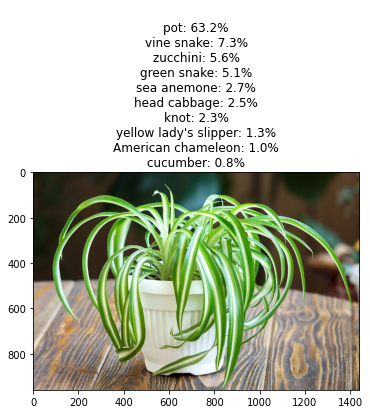

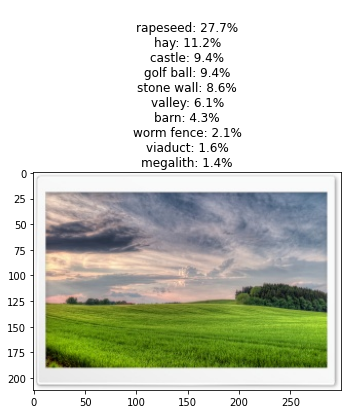

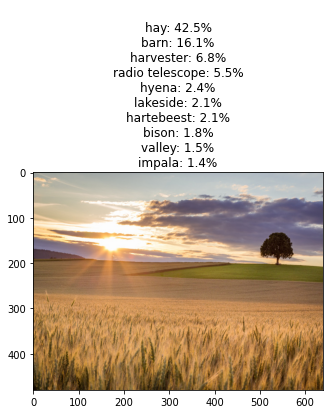

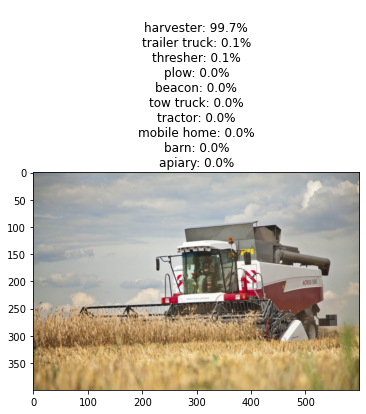

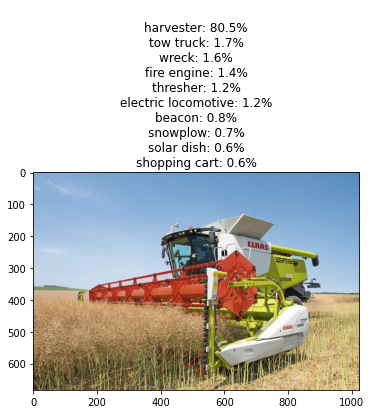

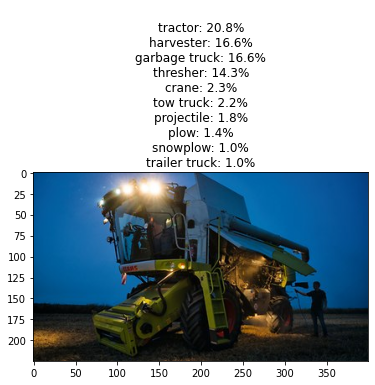

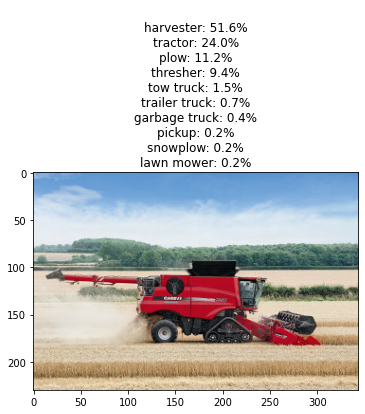

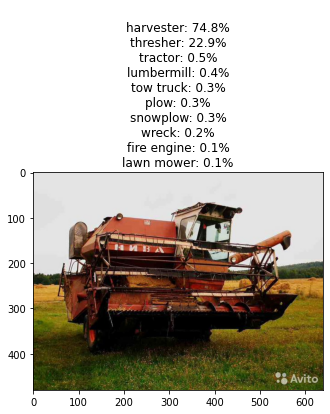

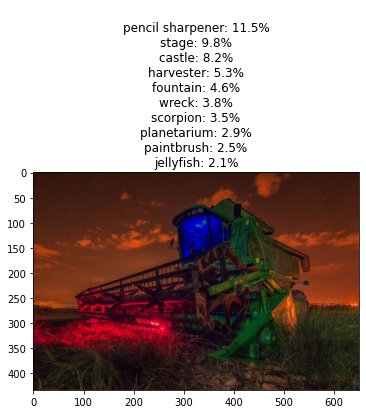

In [116]:
test1 = process(agro, 10)

# Задание для самостоятельного исследования
1. В заданной категории объектов собрать набор изображений (датасет), который будет обладать следующими характеристиками:
- успешно классифицируются (50% выборки)
- распознаются ошибочно (50% выборки)
- различная освещенность объектов (день, ночь, сумерки, на рассвете/закате)
- различный угол взгляда (фронтальная, сбоку, сверху, снизу, в 3/4)
- различное отношение сторон изображения
Размер датасета - 100 изображений.
2. Переобучить выходной слой модели под собранную выборку данных. Продемонстрировать улучшение качества обучения на изображениях, по которым ранее результат был неверным.